## W05 - Class Assignment
#### Deborah Michelle - 0706022310014

In [159]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [160]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [161]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [162]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


## Data Preprocessing

In [163]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [164]:
# Drop Employee_ID as it's only an identifier.
# Drop Hourly_rate as it's redundant with Monthly_Income.
# Drop Years_in_Current_Role and Years_Since_Last_Promotion as it's highly correlated with Years_at_Company.

df = df.drop(columns=['Employee_ID', 'Hourly_Rate', 'Years_in_Current_Role', 'Years_Since_Last_Promotion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Work_Life_Balance              1000 non-null   int64 
 9   Job_Satisfaction               1000 non-null   int64 
 10  Performance_Rating             1000 non-null   int64 
 11  Training_Hours_Last_Year       1000 non-null   int64 
 12  Overtime                       1000 non-null   object
 13  Proj

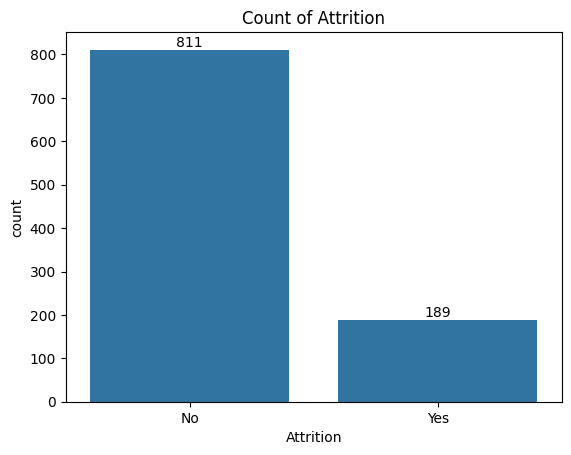

In [165]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

In [166]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Department', 'Job_Role', 'Marital_Status']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
220,47,1,0.0,2.0,2.0,4,8037,26,1,1,4,65,0,8,33,11,4,4,4,1,1,0
186,51,0,0.0,2.0,1.0,3,6590,11,4,5,2,2,1,5,47,18,2,3,3,49,2,0
257,21,1,1.0,4.0,2.0,4,4184,6,4,5,2,43,1,7,35,5,3,2,1,24,2,0
396,33,1,1.0,3.0,2.0,4,7086,21,4,5,2,73,0,7,33,2,4,4,1,22,2,0
806,52,0,2.0,4.0,3.0,3,9937,7,4,1,3,71,1,1,58,4,3,4,1,37,2,0


In [167]:
# checking encode result
df.loc[480]

Age                                     31
Gender                              Female
Marital_Status                      Single
Department                       Marketing
Job_Role                           Manager
Job_Level                                5
Monthly_Income                        4191
Years_at_Company                        18
Work_Life_Balance                        2
Job_Satisfaction                         1
Performance_Rating                       3
Training_Hours_Last_Year                13
Overtime                               Yes
Project_Count                            2
Average_Hours_Worked_Per_Week           53
Absenteeism                              5
Work_Environment_Satisfaction            1
Relationship_with_Manager                3
Job_Involvement                          2
Distance_From_Home                       1
Number_of_Companies_Worked               1
Attrition                               No
Name: 480, dtype: object

## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).

In [168]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [169]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,15,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,6,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,10,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,29,2,5,1,64,0,3,33,0,4,1,3,44,3


In [170]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

## Split data

### Subtask:
Split the encoded data into training and testing sets.

**Reasoning**:
Split the encoded feature DataFrame X and the target Series y into training and testing sets.

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [172]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 21), (300, 21))

In [173]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,1.0,2,6144,21,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,2.0,3,3935,7,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,3.0,1,15478,17,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,3.0,4,9040,29,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,0.0,1,11219,21,3,5,1,57,0,3,51,10,2,4,3,45,3


In [174]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,3.0,2,16465,10,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,0.0,5,18871,16,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,2.0,4,11226,26,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,1.0,3,18859,8,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3.0,3,10509,23,3,1,3,79,0,7,48,7,4,1,4,36,1


## Decision Tree Classifier

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       245
           1       0.22      0.29      0.25        55

    accuracy                           0.68       300
   macro avg       0.52      0.53      0.52       300
weighted avg       0.72      0.68      0.69       300



# What to do next?
*   The F1 Score also significantly different so we need to handle this imbalance dataset. <br>
*   The accuracy of training set is 100% and testing set is 79%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc. <br>
*   And maybe we need to select and drop some features for the model.

## Oversampling using SMOTENC

In [176]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Department',
    'Gender',
    'Job_Role',
    'Job_Level',
    'Marital_Status',
    'Overtime',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 21), (487, 21))

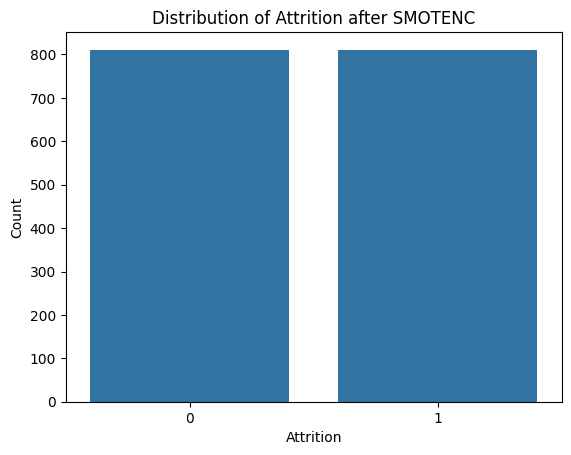

In [177]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Work_Life_Balance              1000 non-null   int64 
 9   Job_Satisfaction               1000 non-null   int64 
 10  Performance_Rating             1000 non-null   int64 
 11  Training_Hours_Last_Year       1000 non-null   int64 
 12  Overtime                       1000 non-null   object
 13  Proj

In [179]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       244
           1       0.63      0.67      0.65       243

    accuracy                           0.64       487
   macro avg       0.64      0.64      0.64       487
weighted avg       0.64      0.64      0.64       487



Wow the performance is getting higher, but i want to handle overfitting by using KFold Cross Validation

## KFold Cross Validation

In [180]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [181]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7        0.7204611  0.71856287 0.64375    0.75338753]
Average score: 0.71


In [182]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'random_state': 0}
Best cross-validation f1 score: 0.708


## Feature Importance

In [183]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.05952112 0.00234949 0.02866973 0.02017712 0.01648859 0.02146239
 0.11535988 0.08161771 0.00264317 0.01403388 0.03865365 0.11966733
 0.00293686 0.06082548 0.08823149 0.09047709 0.02034451 0.01512009
 0.04762893 0.09622227 0.05756923]


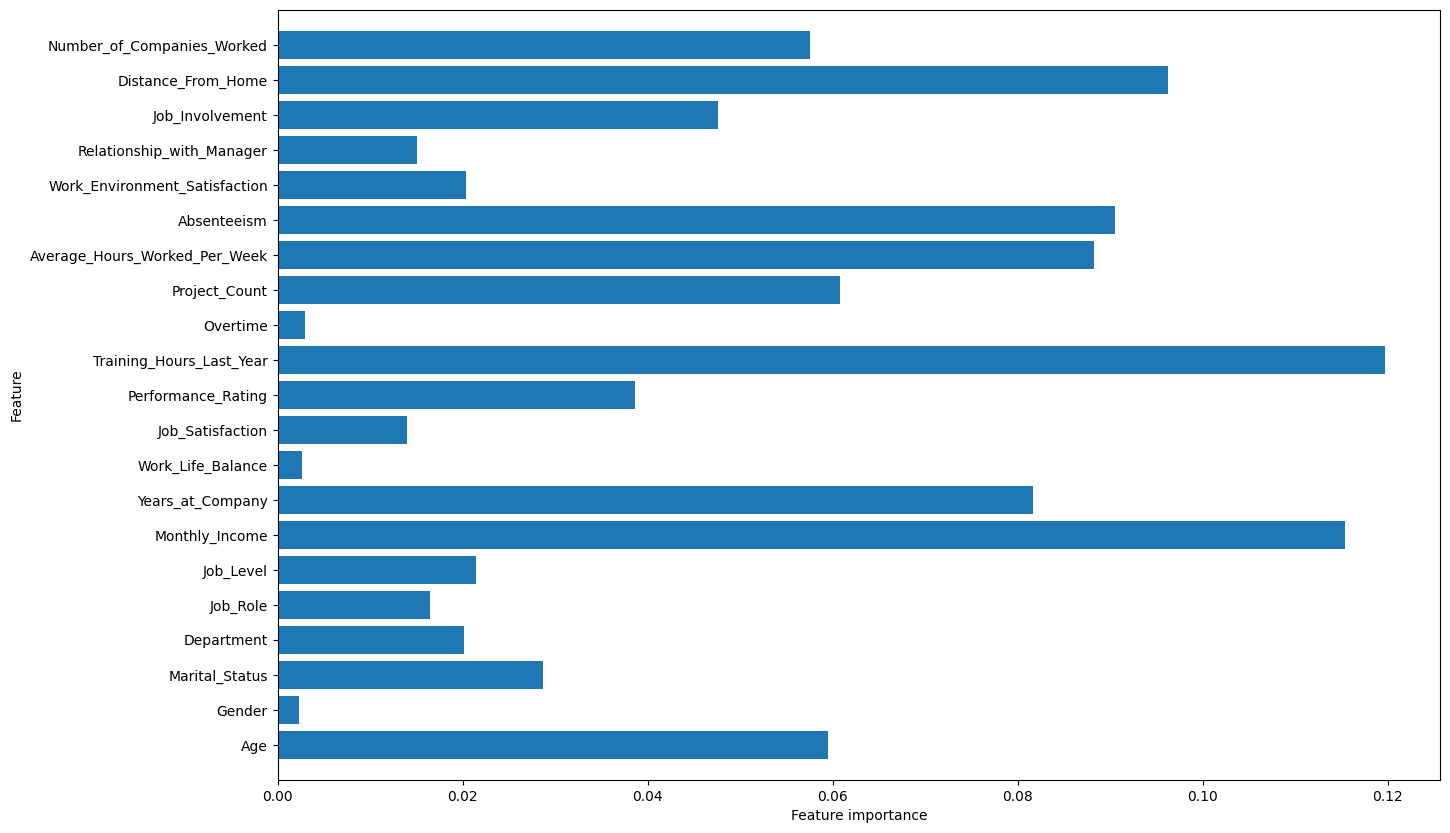

In [184]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [185]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

Training_Hours_Last_Year         0.119667
Monthly_Income                   0.115360
Distance_From_Home               0.096222
Absenteeism                      0.090477
Average_Hours_Worked_Per_Week    0.088231
Years_at_Company                 0.081618
Project_Count                    0.060825
Age                              0.059521
Number_of_Companies_Worked       0.057569
dtype: float64

In [186]:
# using only important features for the prediction
important_features = [
'Absenteeism',
'Average_Hours_Worked_Per_Week',
'Job_Level',
'Age',
'Performance_Rating',
'Training_Hours_Last_Year',
'Years_at_Company',
'Monthly_Income',
'Distance_From_Home',
'Project_Count',
]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [187]:
display(X_importance)
display(y_importance)

,Absenteeism,Average_Hours_Worked_Per_Week,Job_Level,Age,Performance_Rating,Training_Hours_Last_Year,Years_at_Company,Monthly_Income,Distance_From_Home,Project_Count
0,17,54,1,58,4,14,15,15488,20,6
1,1,45,5,48,1,6,6,13079,25,2
2,2,34,1,34,1,77,24,13744,45,6
3,18,48,1,27,4,49,10,6809,35,9
4,0,33,1,40,1,64,29,10206,44,3
...,...,...,...,...,...,...,...,...,...,...
995,10,46,2,27,4,76,24,4172,24,4
996,16,36,4,47,1,53,19,11007,39,7
997,9,46,1,50,1,7,25,4641,33,1
998,17,52,4,28,2,54,13,19855,41,4


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Attrition, Length: 1000, dtype: int64

In [188]:
# oversampling againnn

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 10), (487, 10))

In [189]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       255
           1       0.68      0.75      0.71       232

    accuracy                           0.71       487
   macro avg       0.71      0.71      0.71       487
weighted avg       0.71      0.71      0.71       487



## Selecting Predictors/Features Based on Correlation

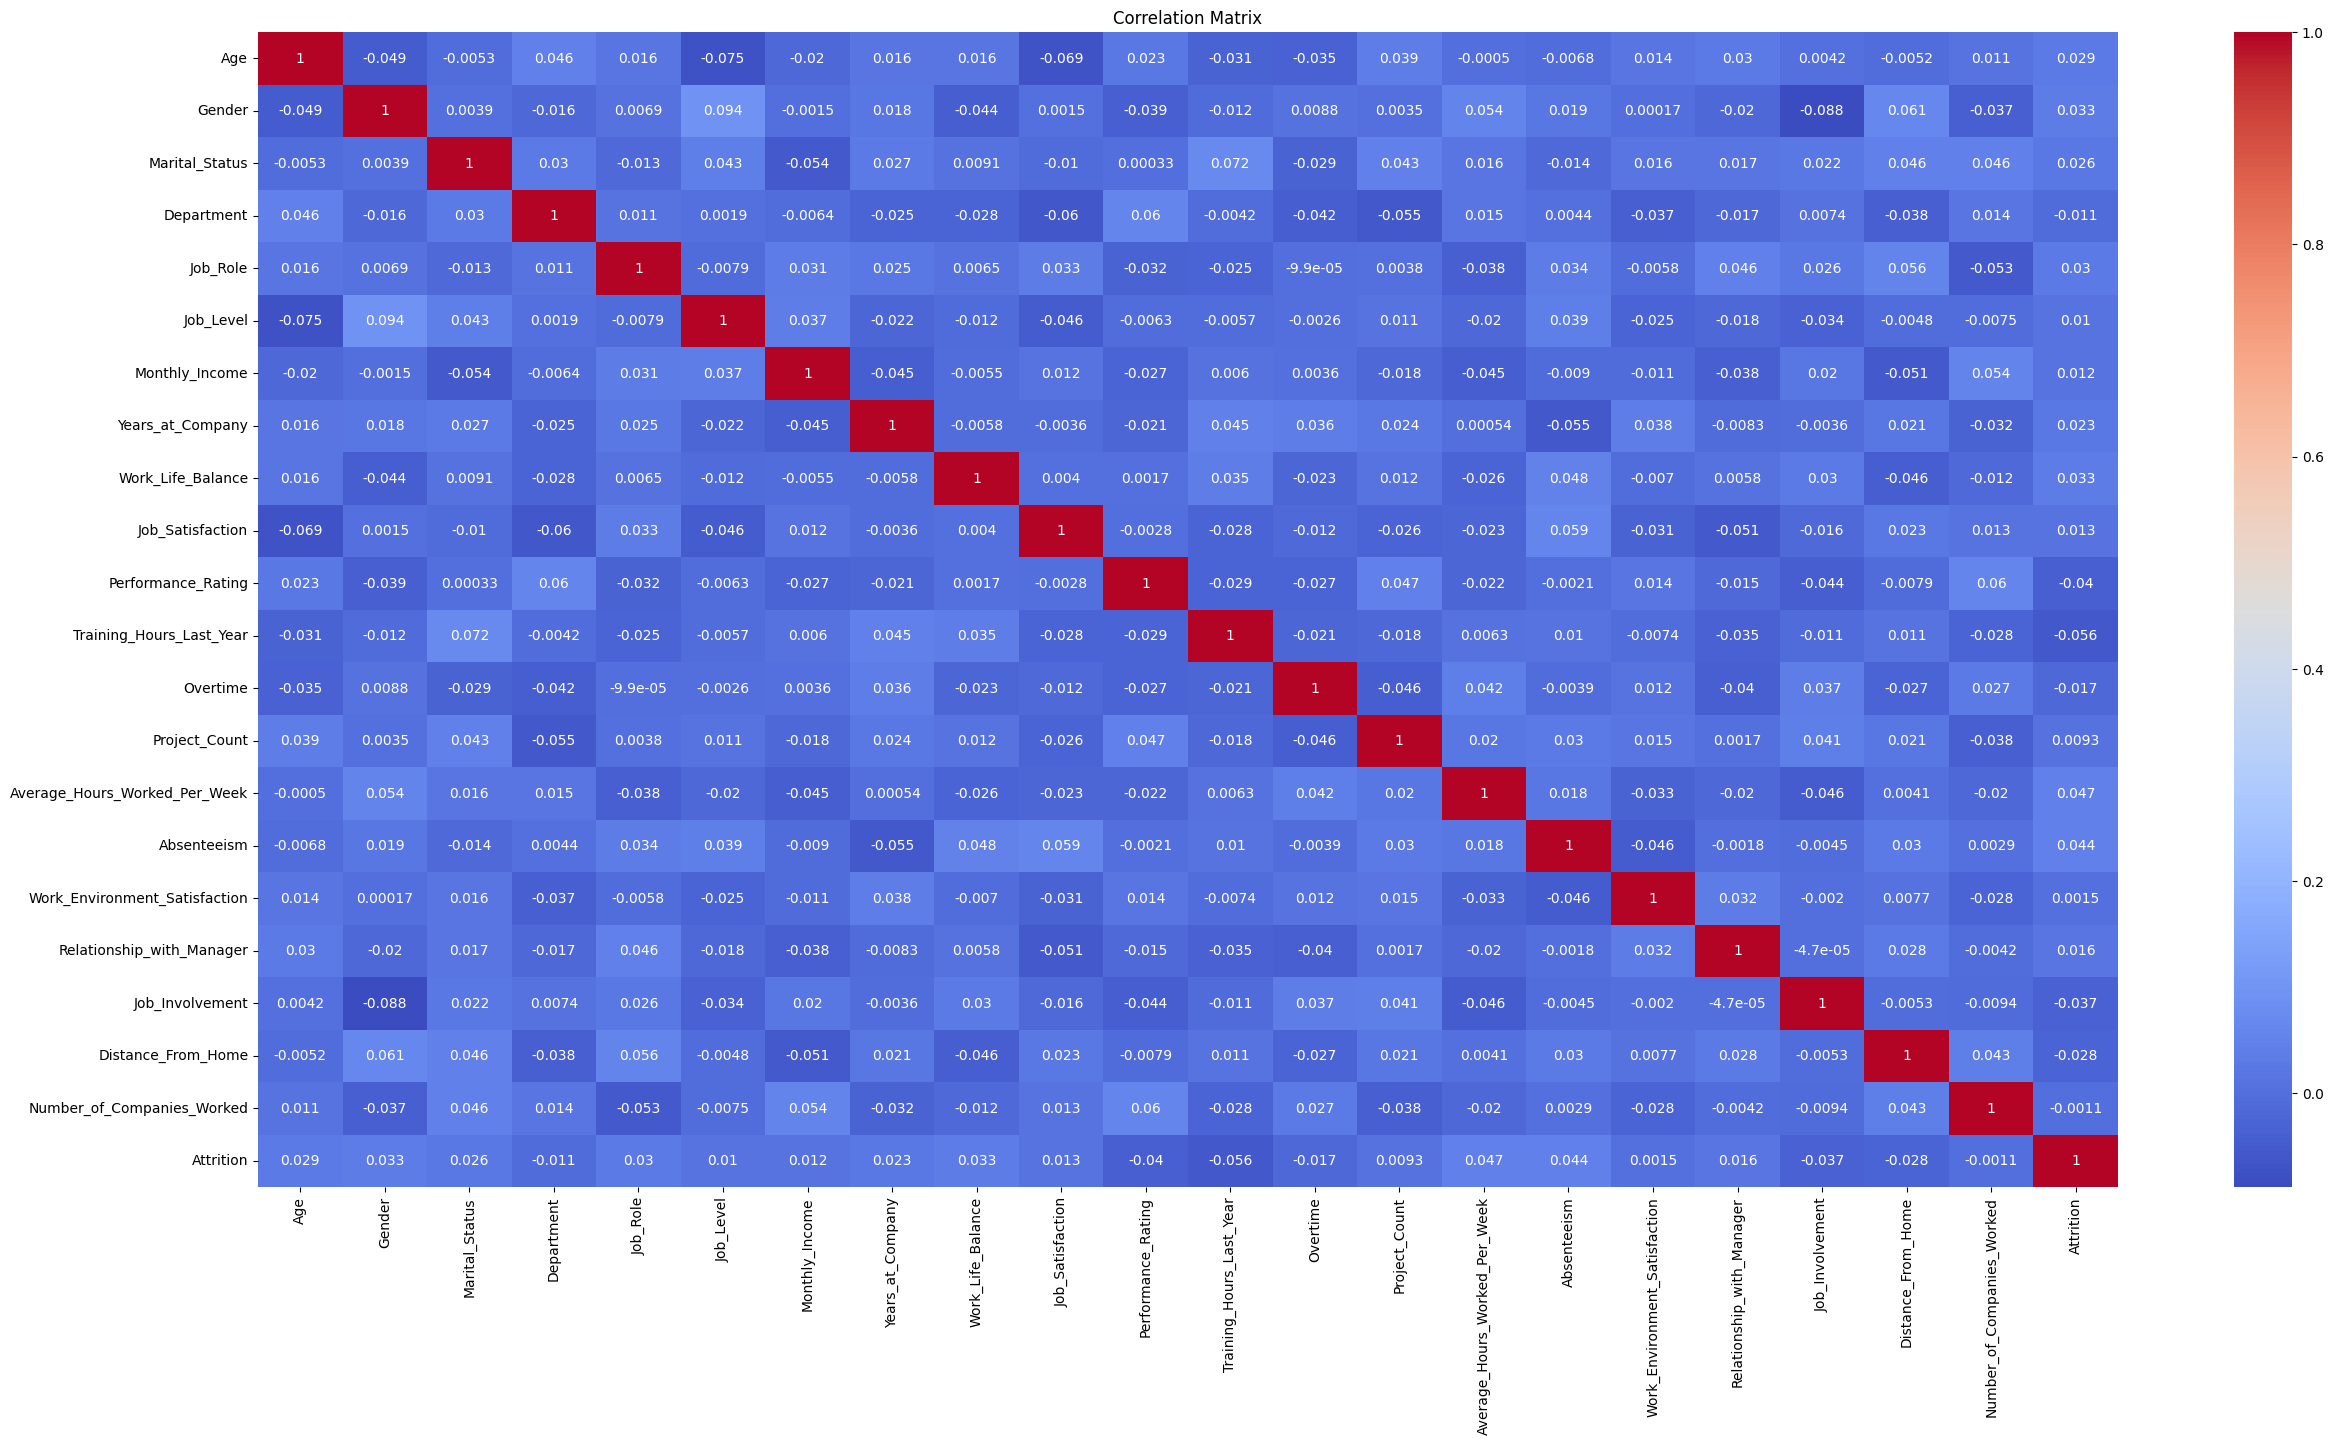

In [190]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [191]:
# I only choose some highest correlation and if there are two predictors have high correlation, i will only choose one with higher correlation
# For the example JobLevel and MonthlyIncome, i only choose JobLevel

heatmap_features = ['Age', 'Overtime', 'Average_Hours_Worked_Per_Week', 'Job_Level', 'Absenteeism']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [192]:
# dont forget to define the categorical features ok
categorical_features = ["Job_Level", "Overtime",]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 5), (487, 5))

In [193]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       244
           1       0.69      0.73      0.71       243

    accuracy                           0.70       487
   macro avg       0.70      0.70      0.70       487
weighted avg       0.70      0.70      0.70       487



## Hyperparameter Tuning using Grid Search

In [194]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'random_state': 0}
Best cross-validation f1 score: 0.675


In [195]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.74      0.34      0.46       567
           1       0.57      0.88      0.69       568

    accuracy                           0.61      1135
   macro avg       0.66      0.61      0.58      1135
weighted avg       0.66      0.61      0.58      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.70      0.31      0.43       244
           1       0.56      0.86      0.68       243

    accuracy                           0.59       487
   macro avg       0.63      0.59      0.55       487
weighted avg       0.63      0.59      0.55       487



## Model Evaluation

### Evaluate models on both training and test data using: Accuracy, Precision, Recall, F1-score

When evaluating the models on both training and test data, clear differences appear in terms of accuracy, precision, recall, and F1-score. The baseline Decision Tree model achieved perfect performance on the training set with an accuracy of 1.00, precision and recall of 1.00 for both classes, but this did not generalize wel. The test accuracy dropped to 0.68, with a high precision (0.83) but poor recall (0.29) for the minority class, leading to an overall F1-score of 0.52. This indicates severe overfitting and poor ability to identify the minority class. In contrast, the tuned Decision Tree model (using SMOTENC, feature selection, and K-Fold CV) maintained the same perfect training accuracy (1.00) but achieved a higher and more balanced test performance with accuracy around 0.71, precision of 0.74 (class 0) and 0.68 (class 1), recall of 0.67 (class 0) and 0.75 (class 1), and an overall F1-score of 0.71. These results demonstrate that the tuned model not only generalizes better but also achieves a more balanced trade-off between precision and recall, effectively handling class imbalance and improving prediction consistency across both classes.


### Identify which model and hyperparameter combination performs best

The best performing model is decision tree using K-fold cross-validation with an accuracy of 0.71 and f1 score of 0.71. 

The baseline Decision Tree initially achieved perfect accuracy on the training set (1.00) but only 0.68 on the test set, indicating clear overfitting the model memorized the training data instead of learning generalizable patterns. When SMOTENC was applied to balance the dataset, the recall for the minority class improved, but the overall accuracy slightly decreased to 0.64, showing that while class balance was achieved, the model still lacked stability. The K-Fold cross-validation approach, however, provided a more reliable evaluation by training and validating across multiple data splits, resulting in an average accuracy of around 0.71 and an F1-score of 0.708. This indicates the model’s predictions were more consistent and generalizable.

### Compare baseline vs tuned model performance

The tuned Decision Tree model outperforms the baseline in both accuracy and balance between classes. The baseline achieved perfect training accuracy (1.00) but only 0.68 on the test set, showing strong overfitting and poor detection of the minority class (recall 0.29). After applying SMOTENC for data balancing, feature selection to reduce noise, and K-Fold cross-validation for more stable training, the tuned model reached about 0.71 test accuracy and an F1-score of 0.71. It also showed a much better recall for the minority class (0.75), indicating improved generalization and fairness. Overall, the tuned model is more reliable, less overfitted, and performs better across both classes.

## Discussion and Insights

### Explain how your preprocessing choices (encoding, resampling, etc.) affected model performance

The preprocessing  had a significant impact on model performance. Encoding transformed categorical data into numerical allows the Decision Tree model to interpret and split on these features effectively. Meanwhile, SMOTENC helped balance the dataset by generating synthetic samples for the minority class, improving the model’s ability to detect employees likely to leave. As a result, the recall and F1-score for the minority (employees who left) class increased, reducing bias towards class and leading to a more balanced overall performance.